# Predicting Loan Default

In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visulas
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
## import and read file
df = pd.read_excel(r"C:\Users\benke\Downloads\Default_Fin.xlsx")
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
#  drop the index column
df.drop(columns = 'Index', inplace = True)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [5]:
# rename defaulted? as defaulted
df.rename(columns = {'Defaulted?': 'Defaulted'}, inplace =True )
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [6]:
df.shape

(10000, 4)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [25]:
# check for missing values
df.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted        0
dtype: int64

In [26]:
# write a code for the Employed to have: 0 = unemployed, 1 = employed
def employ_status(x):
    if x == 1:
        return 'Employed'
    else:
        return 'Unemployed'
df['Employed'] = df['Employed'].apply(employ_status)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,Employed,8754.36,532339.56,0
1,Unemployed,9806.16,145273.56,0
2,Employed,12882.60,381205.68,0
3,Employed,6351.00,428453.88,0
4,Employed,9427.92,461562.00,0


In [27]:
# summary statistics of the data
df.describe().astype('int')

,Bank Balance,Annual Salary,Defaulted
count,10000,10000,10000
mean,10024,402203,0
std,5804,160039,0
min,0,9263,0
25%,5780,256085,0
50%,9883,414631,0
75%,13995,525692,0
max,31851,882650,1


In [28]:
# check for negative values
df[df[['Bank Balance', 'Annual Salary']] < 0].sum()

Employed           0
Bank Balance     0.0
Annual Salary    0.0
Defaulted        0.0
dtype: object

In [29]:
# check for duplicates
df.duplicated().sum()

0

# Exploratory Data Analysis

## Univariate Analysis

In [30]:
df.columns.tolist()

['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted']

In [31]:
# distribution of Employed
dist_employ = df['Employed'].value_counts()
dist_employ

Employed
Employed      7056
Unemployed    2944
Name: count, dtype: int64

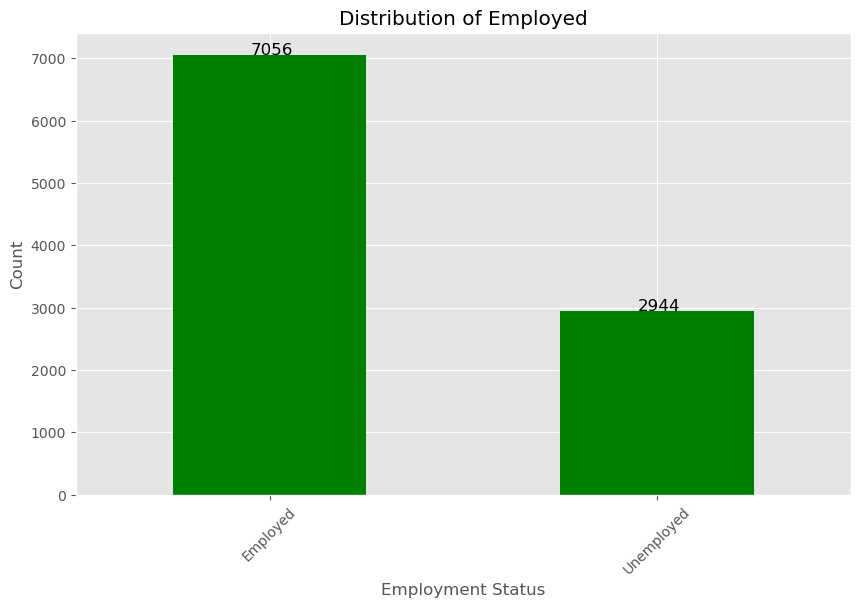

In [32]:
# Distribution of Employed
plt.figure(figsize=(10, 6))
ax = dist_employ.plot(kind='bar', color='green')
ax.set_title('Distribution of Employed')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count')
ax.set_xticklabels(dist_employ.index, rotation=45)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')
plt.show()


*It shows that there are 7056 employed workers, and 2944 unemployed workers*

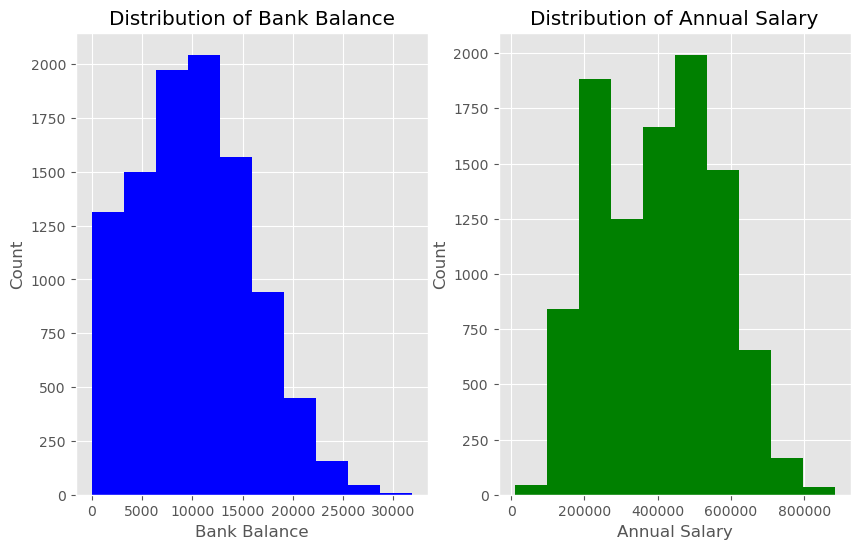

In [33]:
# Create subplots for the distribution of Bank Balance, and Annual Salary
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Customize subplot 1 - Bank Balance
axs[0].hist(df['Bank Balance'], bins=10, color='blue')
axs[0].set_title('Distribution of Bank Balance')
axs[0].set_xlabel('Bank Balance')
axs[0].set_ylabel('Count')

# Customize subplot 2 - Annual Salary
axs[1].hist(df['Annual Salary'], bins=10, color='green')
axs[1].set_title('Distribution of Annual Salary')
axs[1].set_xlabel('Annual Salary')
axs[1].set_ylabel('Count')

# Display the plot
plt.show()


*It shows that most employees have account balance above 10,000 while their annual earning salary to be below 500,000.*

In [34]:
# distribution for the Defaulted
dist_default = df['Defaulted'].value_counts()
dist_default

Defaulted
0    9667
1     333
Name: count, dtype: int64

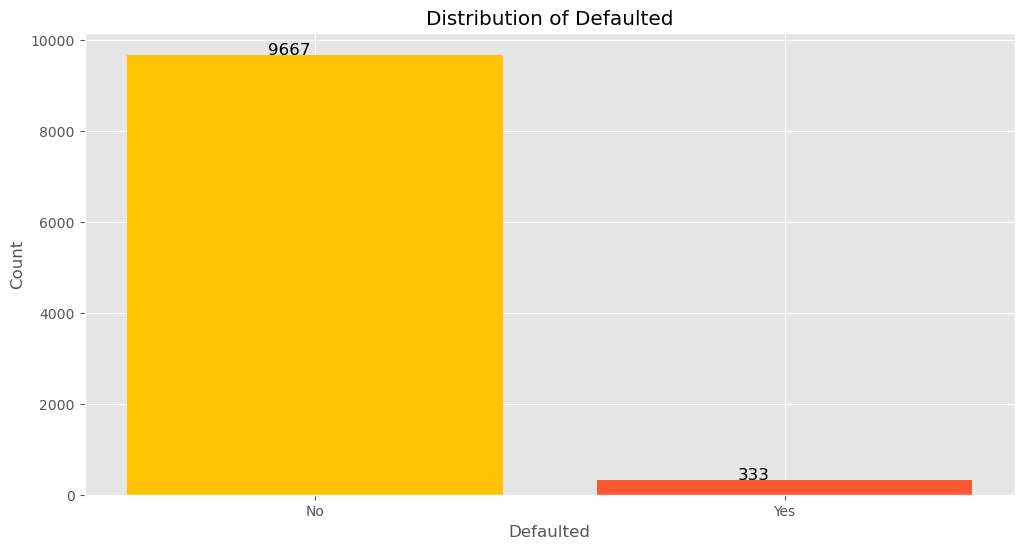

In [35]:
# Customize the chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(dist_default.index, dist_default.values, color=['#FFC300', '#FF5733'])
ax.set_title('Distribution of Defaulted')
ax.set_xlabel('Defaulted')
ax.set_ylabel('Count')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')

# Display the plot
plt.show()


*It shows that most employees of about 9667 will not default in loan payment while 333 employees shows tendency to default loan payment*

## Bivariate Analysis

In [36]:
df.columns.tolist()

['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted']

In [37]:
# Bank Balance By Employed
bank_employ = df.groupby('Employed')['Bank Balance'].mean().round()
bank_employ

Employed
Employed       9261.0
Unemployed    11854.0
Name: Bank Balance, dtype: float64

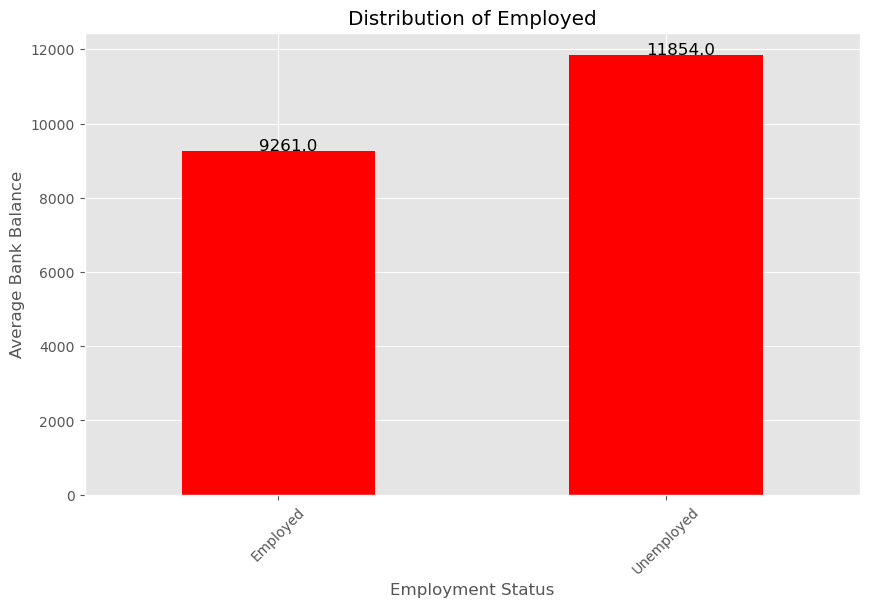

In [38]:
# Distribution of Employed By Bank Balance
plt.figure(figsize=(10, 6))
ax = bank_employ.plot(kind='bar', color='red')
ax.set_title('Distribution of Employed')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Average Bank Balance')
ax.set_xticklabels(dist_employ.index, rotation=45)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')
plt.show()


*It shows the unemployed workers have more bank balance, on average of 11854 compared to the employed workerd with an average of 9261*

In [39]:
# Annual Salary By Employed
annual_employ = df.groupby('Employed')['Annual Salary'].describe().astype('int')
annual_employ

,count,mean,std,min,25%,50%,75%,max
Employed,,,,,,,,
Employed,7056,480143,120123,96211,401009,478719,562086,882650
Unemployed,2944,215402,54396,9263,178642,215928,251831,396041


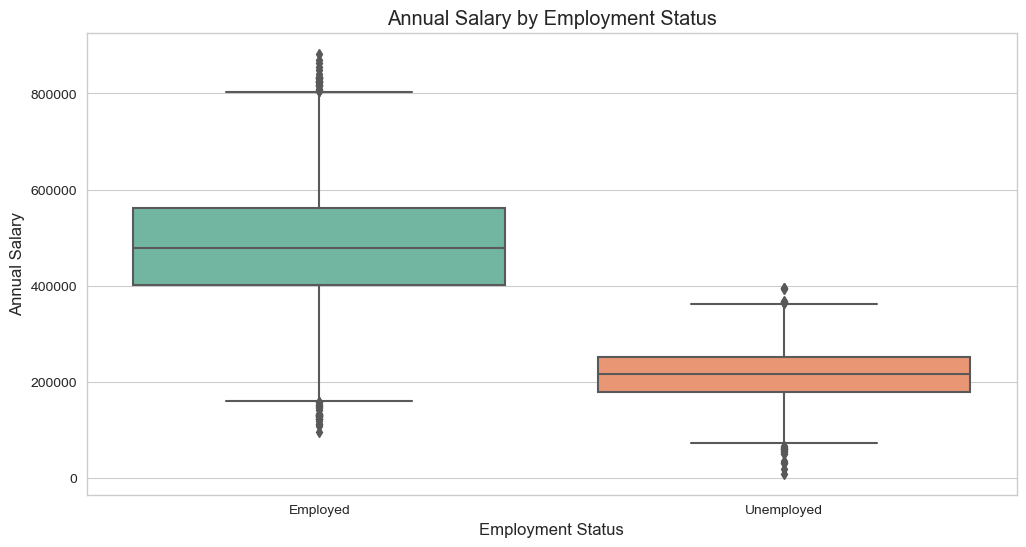

In [40]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employed', y='Annual Salary', data=df, palette='Set2')
plt.title('Annual Salary by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Annual Salary')

# Display the plot
plt.show()


*It shows that Seventy-five percent of the employees in  earn a salary of over 500,000, while the remaining 25 percent earn less than 500,000. The minimum salary  is below 200,000, and the maximum salary is 800,000 while Seventy-five percent of the unemployed in  earn an annual income of over 200,000, while the remaining 25 percent earn less than 200,000. The maximum annual income is 396,041*

In [41]:
# Distribution of Annual Salary By Default
annual_default = df.groupby('Defaulted')['Annual Salary'].describe().astype('int')
annual_default

,count,mean,std,min,25%,50%,75%,max
Defaulted,,,,,,,,
0,9667,402793,159819,9263,256860,415073,525885,882650
1,333,385069,165650,115965,228330,378184,516807,797597


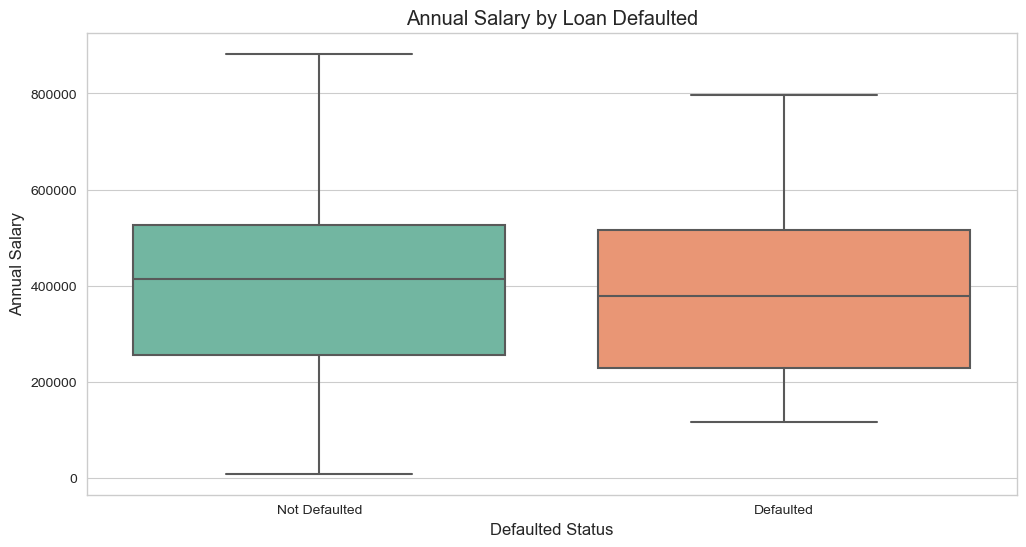

In [42]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Defaulted', y='Annual Salary', data=df, palette='Set2')

# Add legend to the x-axis
plt.xticks(ticks=[0, 1], labels=['Not Defaulted', 'Defaulted'])

plt.title('Annual Salary by Loan Defaulted')
plt.xlabel('Defaulted Status')
plt.ylabel('Annual Salary')

# Display the plot
plt.show()


*Seventy-five percent of non-defaulted individuals earn 525,885, while the remaining 25 percent earns 256,860. The maximum salary for non-defaulted individuals is 882,650. For defaulted individuals, 75 percent earn 516,808, while the remaining 25 percent earn 228,330. The maximum salary earned by defaulted individuals is 797,597*

In [43]:
# Account Balance By Defaulted
bank_default = df.groupby('Defaulted')['Bank Balance'].describe().astype('int')
bank_default


,count,mean,std,min,25%,50%,75%,max
Defaulted,,,,,,,,
0,9667,9647,5477,0,5588,9634,13539,28692
1,333,20973,4095,7828,18139,21469,23866,31851


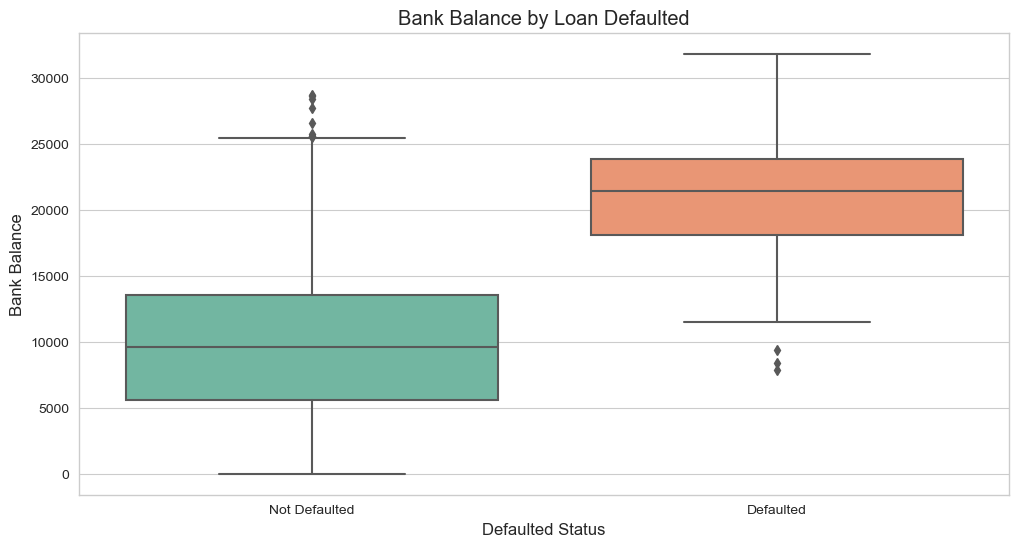

In [44]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Defaulted', y='Bank Balance', data=df, palette='Set2')

# Add legend to the x-axis
plt.xticks(ticks=[0, 1], labels=['Not Defaulted', 'Defaulted'])

plt.title('Bank Balance by Loan Defaulted')
plt.xlabel('Defaulted Status')
plt.ylabel('Bank Balance')

# Display the plot
plt.show()

*75%  of the not defaulted employees have 13539 in their bank balance, while 25% of them have 5588 and the max account balance for non defaulted is 28692. 75% Defaulted have 23866 in their bank balance while 25% defaulted have 18139 in their bank balance and the min bank balnace for defaulted is 7228*

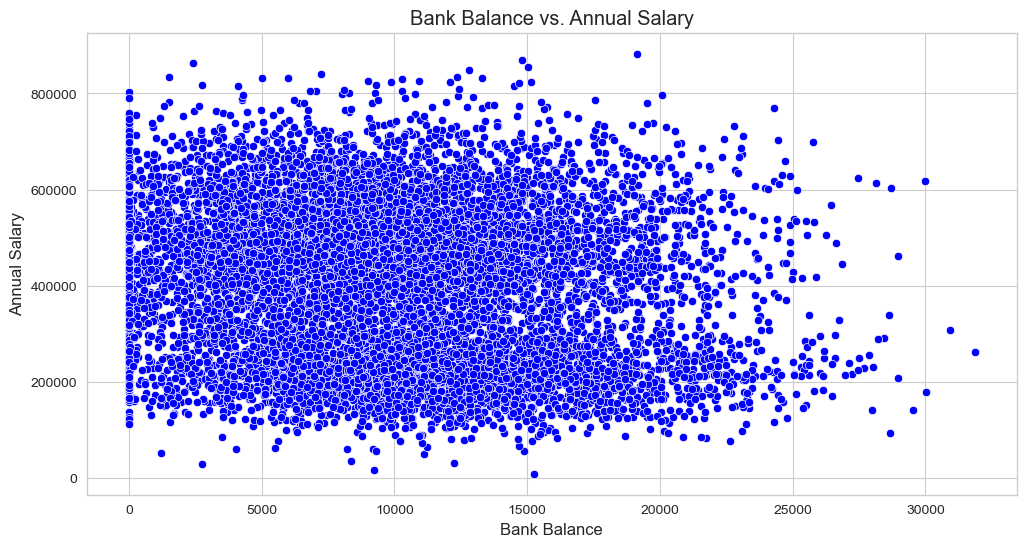

Pearsons correlation: -0.152


In [45]:
# Correlation between Bank Balance and Annual Salary
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Bank Balance', y='Annual Salary', data=df, color='blue')

plt.title('Bank Balance vs. Annual Salary')
plt.xlabel('Bank Balance')
plt.ylabel('Annual Salary')

# Display the plot
plt.show()

# Add Pearson correlation to the plot
corr = df['Bank Balance'].corr(df['Annual Salary'])
print('Pearsons correlation: %.3f' % corr)

*It shows a slight negative correlation between the two independednt variable, with a correlation coefficient of -0.152, which means that as Annual Salary increases the Bank Balance reduces.*

## Next Steps to achieving the Objective:
To predict the likelihood that an employee will default on a loan using the above variables, you can use a binary classification model. You can train the model on historical data where you know the loan default status of each employee, and then use the model to predict the loan default status of new employees based on their features.

Some popular binary classification algorithms include logistic regression, decision trees, random forests, and support vector machines (SVMs). You can compare the performance of these algorithms on your data to select the best one for your problem.

To visualize the performance of the model, you can use a confusion matrix, ROC curve, and precision-recall curve. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives predicted by the model. The ROC curve plots the true positive rate against the false positive rate at different classification thresholds, and the AUC score measures the overall performance of the model. The precision-recall curve plots the precision against the recall at different classification thresholds, and the F1 score measures the overall performance of the model.

Another useful visualization technique is to plot the decision boundary of the model in a 2D or 3D feature space. This can help you understand how the model is making predictions based on the different features.

Overall, the perfect technique for visualizing the performance of a binary classification model depends on the specific problem and dataset. You can try different techniques and select the ones that are most informative and easy to interpret for your particular problem.

## Convert Categorical Column to Numerical
- One-Hot Encoding
- Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Employed' column
df['Employed'] = le.fit_transform(df['Employed'])

# Print the first two rows of the 'Employed' column
print(df['Employed'].head(2))


0    0
1    1
Name: Employed, dtype: int32


## Feature Selection
- Select the target of the dataset, y = defaulted
- Select the independent variable, X

In [47]:
df.head(2)

,Employed,Bank Balance,Annual Salary,Defaulted
0,0,8754.36,532339.56,0
1,1,9806.16,145273.56,0


In [48]:
# select the target of the dataset, y
y = df['Defaulted']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Defaulted, dtype: int64

In [49]:
y.shape

(10000,)

In [50]:
# select the independent variables, X
X = df.drop(columns = 'Defaulted', axis = 1)
X.head()

,Employed,Bank Balance,Annual Salary
0,0,8754.36,532339.56
1,1,9806.16,145273.56
2,0,12882.60,381205.68
3,0,6351.00,428453.88
4,0,9427.92,461562.00


### Oversampling using SMOTE
- SMOTE(Synthetic Minority Oversampling Technique)

In [51]:
!pip install -U imbalanced-learn

In [53]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Adjust the 'sampling_strategy' if needed


# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)


# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 9667, 1: 333})
Class distribution after resampling: Counter({0: 9667, 1: 9667})


## Model Selection
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbor Classifier
- Support Vector Machines

## Train-Test-Split
We are splitting the X and y into training set and testing using 70-30 ratio.

In [55]:
# import the train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


        Employed  Bank Balance  Annual Salary
10873         0  25433.494933  289240.285616
9870          1  12463.440000  147754.800000

       Employed  Bank Balance  Annual Salary
3485         1       3545.76      207888.48
7660         0       1530.60      396846.00

 10873    1
9870     0
Name: Defaulted, dtype: int64

 3485    0
7660    0
Name: Defaulted, dtype: int64


In [56]:
print('\n The Shape of X_train', X_train.shape)
print('\n The Shape of X_test', X_test.shape)
print('\n The Shape of y_train', y_train.shape)
print('\n The Shape of y_test', y_test.shape)


 The Shape of X_train (13533, 3)

 The Shape of X_test (5801, 3)

 The Shape of y_train (13533,)

 The Shape of y_test (5801,)


## Data Scaling (Standardization)
It is also called data standardization: it is a preprocessing step towards transforming the features of the data to have a similar scale. It is important because may machine learning algorithms perform better or converge faster when the features are on a similar scale.

**Methods of Scaling:**
- Min-Max Scaling
- Standard Scaler.

In [57]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()
# fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Model Training

#### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = lr_model.predict(X_test_scaled)

# print the accuracy score for logistic regression
print(f'The accuracy score for logistic regression is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for logistic regression is 90.10000000000001%


#### Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier()
dc_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [61]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = dc_model.predict(X_test_scaled)

# print the accuracy score for decision tree classifier
print(f'The accuracy score for decision tree is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for decision tree is 91.2%


#### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [63]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = rf_model.predict(X_test_scaled)

# print the accuracy score for random forest classifier
print(f'The accuracy score for random forest is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for random forest is 92.9%


#### K-Nearest Neighbour

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [65]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = knn_model.predict(X_test_scaled)

# print the accuracy score KNearest Neighbor classifier
print(f'The accuracy score for KNearest Neighbor is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for KNearest Neighbor is 91.60000000000001%


#### Support Vector Machines(SVMs)

In [66]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [67]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = svm_model.predict(X_test_scaled)

# print the accuracy score for Support Vector Machines
print(f'The accuracy score for Support Vector is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for Support Vector is 90.2%


## Model Evaluation
There are various techniques for evaluating the performance of a model. They include:
- Accuracy, Precision, Recall, and F1-Score (Classification Report)
- Confusion Matrix
- AUC-ROC Scores and Curve

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.915     0.883     0.899      2884
    Defaulted      0.888     0.919     0.903      2917

     accuracy                          0.901      5801
    macro avg      0.902     0.901     0.901      5801
 weighted avg      0.902     0.901     0.901      5801



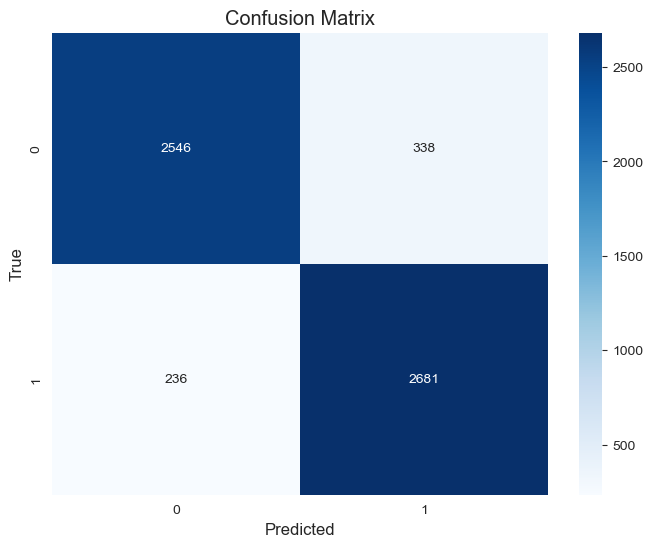

Decision Tree Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.917     0.906     0.911      2884
    Defaulted      0.908     0.918     0.913      2917

     accuracy                          0.912      5801
    macro avg      0.912     0.912     0.912      5801
 weighted avg      0.912     0.912     0.912      5801



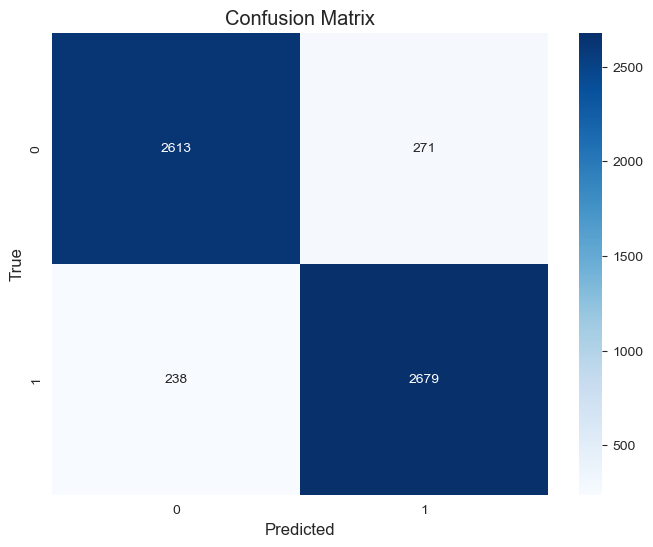

Random Forest Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.951     0.905     0.927      2884
    Defaulted      0.910     0.954     0.932      2917

     accuracy                          0.929      5801
    macro avg      0.931     0.929     0.929      5801
 weighted avg      0.930     0.929     0.929      5801



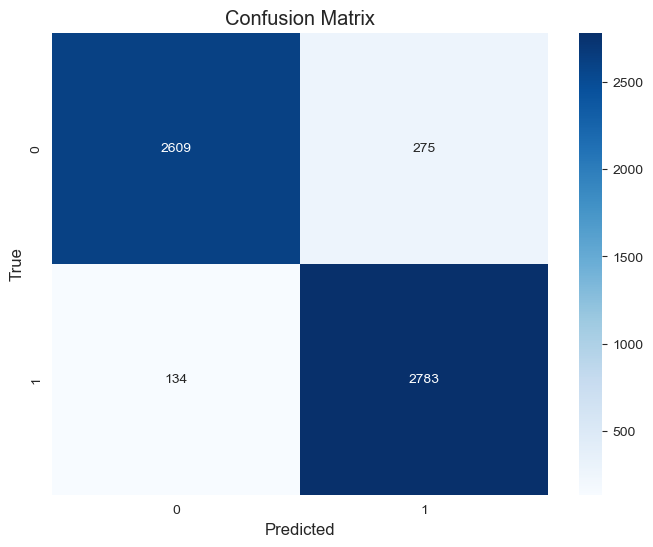

SVM Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.939     0.858     0.897      2884
    Defaulted      0.871     0.945     0.906      2917

     accuracy                          0.902      5801
    macro avg      0.905     0.901     0.902      5801
 weighted avg      0.905     0.902     0.902      5801



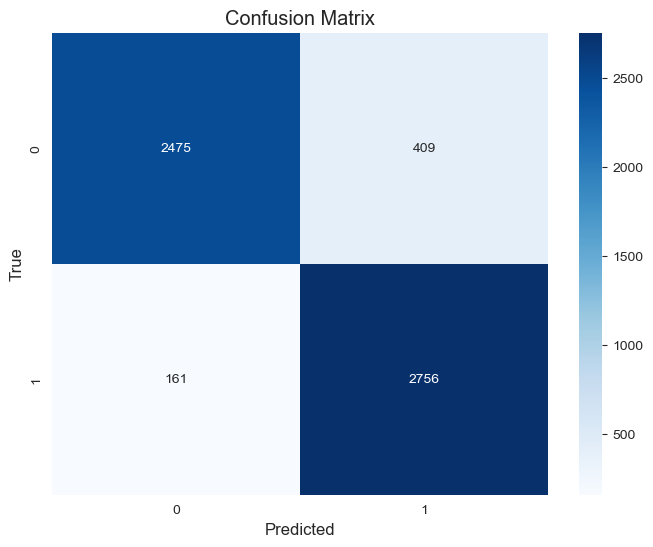

KNN Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.949     0.877     0.912      2884
    Defaulted      0.887     0.953     0.919      2917

     accuracy                          0.916      5801
    macro avg      0.918     0.915     0.915      5801
 weighted avg      0.918     0.916     0.915      5801



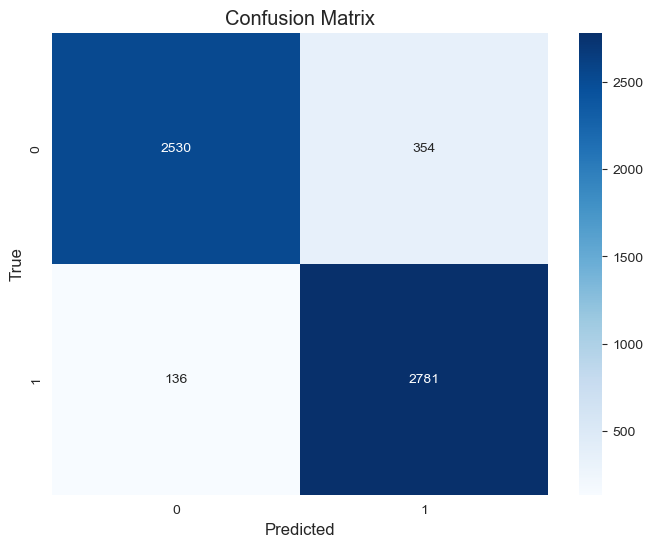

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

# create a list of models
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']

models = [lr_model, dc_model, rf_model, svm_model, knn_model]

# set the decimal places of the values
decimal_places = 3

# set the report labels
labels = ['Not-Defaulted', 'Defaulted']

def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# we can call the function to plot the confusion matrix in the loop:
for i, model in enumerate(models):
    # predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)

    # generate the classification report
    report = classification_report(y_test, y_pred, target_names = labels, digits = decimal_places)
    print(f'{model_names[i]} Classification Report: \n{report}')

    # plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=[0, 1])

### Sumarry of Evaluation Metrics
*It seen that Logistic Regression has a higher F1-Score of 0.44 compared to the other models with a precision of 0.66 and a recall of 0.33. This is able to provide the balance between the loan defaulted(recall) and minimizing false positive(precision) while maintaining a higher accuracy score of 97.2%*

## Hyperparameter Tuning using K-fold Cross Validation
*To ensure that the model does not overfit to the training data, it's important to validate it on a separate data. One way to do that is by splitting the training data into a training set and validation. One technique for this is called K-fold Cross Validation.*

In [69]:
from sklearn.model_selection import cross_val_score

# As logistic regression is the best model
cv_scores = cross_val_score(lr_model, X_train, y_train, cv = 10) # you can adjust the number of folds as needed
print('Cross Validation Scores on Training Set:', cv_scores)
print('Mean CV Score on Training Set:', cv_scores.mean())

Cross Validation Scores on Training Set: [0.77695716 0.77104874 0.79320532 0.75166297 0.75166297 0.75461936
 0.76644494 0.75757576 0.76274945 0.78640059]
Mean CV Score on Training Set: 0.7672327264430157


*After performing 10 fold-cross validation, we obtain a mean CV score of 0.966 on the training set mean that, on average, the model achieved an accuracy of 96.6% across all 10 folds. This indicate that the model performed well and had a high level of predictive accuracy on the training data.*

In [70]:
#The transpose() method transforms the columns into rows and the rows into columns

##### NOrmalization: 
Data Normalization: It is a machine learning techniques that we use to scale the features of our data so when used with machine learning algorithms so it converges faters and falls within a range or scales. It ensures that the algorithm will move faster and falls within the mininmum and the maximum range of the X, which is the feature/dependent variables. It is compulsory for some algorthms like KNN, Forest tree, SVM, and decision.

Data Scaling
People tend to scale their data so it can convert faster and convert within a given range. 

####
**-1.5 is used to know the outliers in the minimum part of your boxplot. It is constant
+1.5 is used to know the outliers in the maximum part of your boxplot. It is also constant. 
Adding 1.5 to the max part and minusing 1.5 from the minimum side helps to create a balance between the upper part and the lower part***

Handling Outliers: If it is skewed to the left or to the right, we can use median to hanlde it. If it is normally distributed, you use the mean. To handle th outliers too, you can drop or replace them with mean or median.

x.quantile()

IQR = Q3 - Q1


To also know if a data is skewed without plotting a histogram, you can import skew from scipy. If it is positive, it means it is skewed to the right and if it is negative, it means it is skewed to the left. 0 means it is a normal distribution. 


.apply is used to apply a function.

**Z-SCORE***
is another method of identifying outliers. It quantifies the relationship between a data point, standard deviation, and mean values of a group of points.
The Z-score limit is btw +3 OR minus3. If yiou do a z-score for your column and it is greater than 3, it means it contains outliers. If it is less than 3, it means there are no outliers. If it is =3, it means no outliers.

median is the 50%

When the data is skewed, we use the median. If it is not skewed, we use the mean. If the mean is greater than the std, it means it is skewed. If the std is greater than the mean, it is a normal distribution. We use the Histogram to know if a dataset is skewd. WHEN we have more histogram bins to the left, it is left skewed, vice versa.


When using scipy to confirm skewness. If it shows a negative value, that is it is skewed to the left. If it is +, is skewed to the  right 